In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
import os
from keras import layers
from keras import models
from keras import optimizers

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Calling the directory containing the dataset 

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [4]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [6]:
cats_tr = len(os.listdir(train_cats_dir))
dogs_tr = len(os.listdir(train_dogs_dir))
total_train = cats_tr + dogs_tr

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_val = num_cats_val + num_dogs_val

In [7]:
print('total training cat images:', cats_tr)
print('total training dog images:', dogs_tr)
print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


Total nnumber of images in training and validation dataset

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
BATCH_SIZE = 100
IMG_SHAPE  = 150

## Data Augmentation

In [10]:
# Defining a function for displaying the images from the dataset 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

### Horizontal Flip

In [11]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


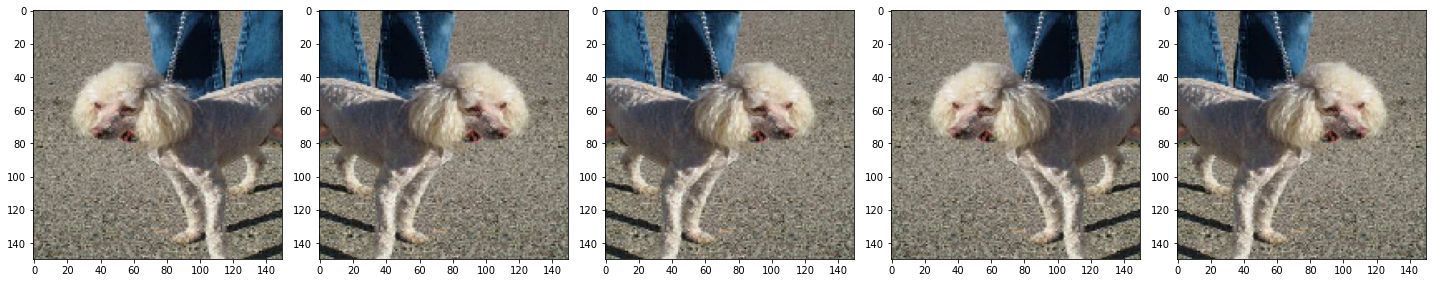

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]
plotImages(augmented_images)

### Rotating the images 

In [13]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=90)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


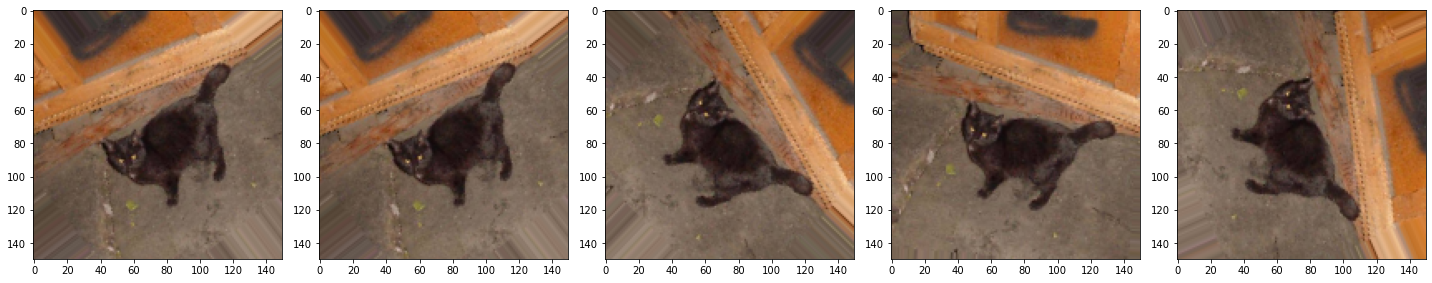

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Zooming  

In [15]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=1.0)
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


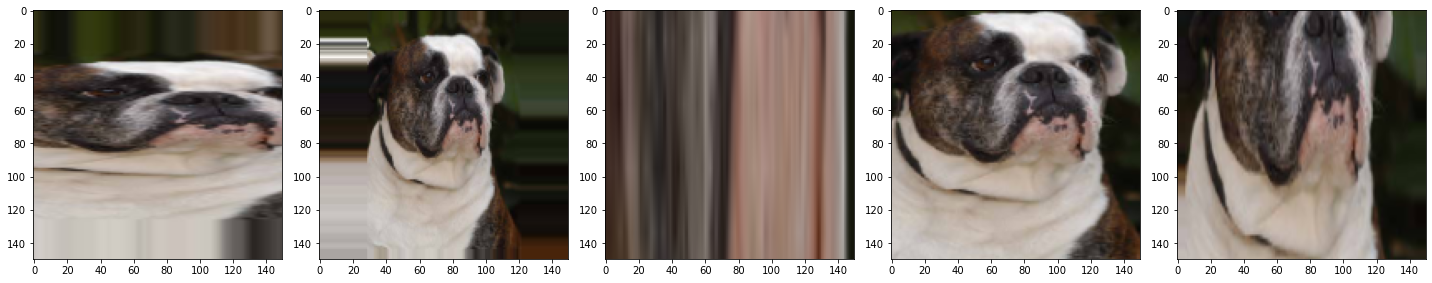

In [16]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Building the CNN model

In [17]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',\
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.RMSprop(lr=1e-4),\
             metrics=['acc'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(train_dir,\
                                                    target_size=(150, 150),\
                                                    batch_size=20,\
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [22]:
validation_generator = test_datagen.flow_from_directory(validation_dir,\
                                                        target_size=(150, 150),\
                                                        batch_size=20,\
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [23]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30


C:\Users\Snigdha\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


50/50 [==============================] - 32s 612ms/step - loss: 0.6939 - acc: 0.5038 - val_loss: 0.6767 - val_acc: 0.5200
Epoch 2/30
50/50 [==============================] - 29s 580ms/step - loss: 0.6771 - acc: 0.5544 - val_loss: 0.6683 - val_acc: 0.6030
Epoch 3/30
50/50 [==============================] - 30s 603ms/step - loss: 0.6614 - acc: 0.6014 - val_loss: 0.6790 - val_acc: 0.5150
Epoch 4/30
50/50 [==============================] - 29s 572ms/step - loss: 0.6491 - acc: 0.6482 - val_loss: 0.6138 - val_acc: 0.6500
Epoch 5/30
50/50 [==============================] - 30s 599ms/step - loss: 0.6322 - acc: 0.6338 - val_loss: 0.6018 - val_acc: 0.6700
Epoch 6/30
50/50 [==============================] - 29s 588ms/step - loss: 0.5925 - acc: 0.6817 - val_loss: 0.5831 - val_acc: 0.6960
Epoch 7/30
50/50 [==============================] - 28s 564ms/step - loss: 0.5728 - acc: 0.6939 - val_loss: 0.5938 - val_acc: 0.6640
Epoch 8/30
50/50 [==============================] - 29s 591ms/step - loss: 0.560

The accuracy comes out to be 74.8%

Text(0.5, 1.0, 'Training and Validation Accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Loss')

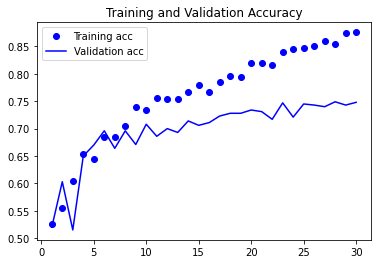

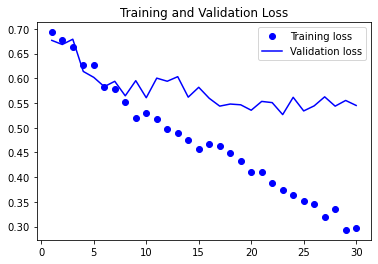

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()



## Transfer Learning

### VGG 16 model

In [25]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (150,150, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [26]:
for layer in base_model.layers:
    layer.trainable = False

In [27]:
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)


# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [28]:
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 253s 3s/step - loss: 0.5014 - acc: 0.7487 - val_loss: 0.4106 - val_acc: 0.8060
Epoch 2/10
100/100 [==============================] - 231s 2s/step - loss: 0.2324 - acc: 0.8987 - val_loss: 0.2567 - val_acc: 0.8820
Epoch 3/10
100/100 [==============================] - 255s 3s/step - loss: 0.1910 - acc: 0.9203 - val_loss: 0.2655 - val_acc: 0.8810
Epoch 4/10
100/100 [==============================] - 236s 2s/step - loss: 0.1378 - acc: 0.9502 - val_loss: 0.2660 - val_acc: 0.8810
Epoch 5/10
100/100 [==============================] - 229s 2s/step - loss: 0.1072 - acc: 0.9649 - val_loss: 0.3541 - val_acc: 0.8610
Epoch 6/10
100/100 [==============================] - 227s 2s/step - loss: 0.0707 - acc: 0.9803 - val_loss: 0.4563 - val_acc: 0.8460
Epoch 7/10
100/100 [==============================] - 229s 2s/step - loss: 0.0654 - acc: 0.9791 - val_loss: 0.2802 - val_acc: 0.8860
Epoch 8/10
100/100 [==============================] - 227s 2s/step - 

The acccuracy comes out to be 88.64%, better than the CNN model

### ResNet 50 

In [29]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(150,150 ,3), include_top=False, weights="imagenet")

In [30]:
for layer in base_model.layers:
    layer.trainable = False

In [31]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

In [32]:
base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [33]:
resnet_history = base_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 521s 5s/step - loss: 2.2035 - acc: 0.5430 - val_loss: 1.2508 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 522s 5s/step - loss: 0.5928 - acc: 0.8117 - val_loss: 0.9300 - val_acc: 0.4490
Epoch 3/10
100/100 [==============================] - 516s 5s/step - loss: 0.3086 - acc: 0.8936 - val_loss: 1.0557 - val_acc: 0.4720
Epoch 4/10
100/100 [==============================] - 527s 5s/step - loss: 0.2120 - acc: 0.9234 - val_loss: 0.9834 - val_acc: 0.4990
Epoch 5/10
100/100 [==============================] - 523s 5s/step - loss: 0.1857 - acc: 0.9357 - val_loss: 0.9198 - val_acc: 0.5360
Epoch 6/10
100/100 [==============================] - 511s 5s/step - loss: 0.1565 - acc: 0.9344 - val_loss: 0.9866 - val_acc: 0.5550
Epoch 7/10
100/100 [==============================] - 506s 5s/step - loss: 0.0927 - acc: 0.9570 - val_loss: 1.1137 - val_acc: 0.6090
Epoch 8/10
100/100 [==============================] - 510s 5s/step - 

Accuracy - 86.70%